In [2]:
import pandas as pd
import xarray as xr
import json

In [3]:
# OpenAQ 224018 is PurpleAir 97767
base_path = "/home/patel_zeel/OpenAQ/PurpleAir/loc_combined/224005.nc"
ds = xr.open_dataset(base_path)
ds

<xarray.Dataset>
Dimensions:      (datetime: 17771, location_id: 1)
Coordinates:
  * datetime     (datetime) datetime64[ns] 2021-04-05T20:00:00 ... 2023-04-16...
  * location_id  (location_id) int64 224005
    lat          (location_id) float64 ...
    lon          (location_id) float64 ...
Data variables:
    value        (datetime, location_id) float64 ...

In [4]:
with open('/home/patel_zeel/OpenAQ/PurpleAir/purpleair_sensors.txt') as f:
    data = json.load(f)
    
df = pd.DataFrame(data['data'], columns=data['fields'])
unique_df = df.drop_duplicates(subset=['sensor_index'])
sensors_ds = unique_df
distances = ((sensors_ds["longitude"] - ds.lon.values[0])**2 + (sensors_ds["latitude"] - ds.lat.values[0])**2).sort_values()
print(distances)
sensors_ds = sensors_ds.loc[distances.index]
sensors_ds

18323    7.270142e-27
2422     2.104394e-03
8920     6.790938e-03
14706    7.088498e-03
1721     7.769099e-03
             ...     
22694             NaN
22836             NaN
23132             NaN
24086             NaN
24173             NaN
Length: 24188, dtype: float64


,sensor_index,last_modified,date_created,last_seen,private,name,icon,location_type,model,hardware,...,latitude,longitude,altitude,channel_state,channel_flags,channel_flags_manual,channel_flags_auto,confidence,confidence_auto,confidence_manual
18323,96759,1.617655e+09,1609268831,1688805499,0,"1242 Stanfill Road Palmdale, CA 93551",0,0,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,34.597710,-118.154076,2691.0,3,0,0,0,100,100.0,100.0
2422,12132,1.614359e+09,1529791845,1688805505,0,AV-EAGLES,0,0,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,34.617250,-118.195580,2633.0,3,1,1,0,80,100.0,60.0
8920,173577,1.673921e+09,1671478082,1688805549,0,Wild Hare Ranch,0,0,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,34.515312,-118.155304,3795.0,3,0,0,0,100,100.0,100.0
14706,76483,1.602119e+09,1601664184,1688805571,0,Sierra Pelona Ridge AQ Station,0,0,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,34.513520,-118.153340,3758.0,3,0,0,0,100,100.0,100.0
1721,8148,1.545085e+09,1520534907,1688805511,0,AV-DIAMONDBACKS,0,0,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,34.545555,-118.083020,2857.0,3,0,0,0,100,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,121211,1.632675e+09,1629245280,1688805577,0,Westwood hill,0,0,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,NaN,NaN,NaN,3,0,0,0,100,100.0,100.0
22836,121917,1.637705e+09,1629416156,1688805511,0,City of Livermore,0,1,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,NaN,NaN,NaN,3,0,0,0,100,100.0,100.0
23132,123471,1.631229e+09,1630015006,1688805537,0,1432 SFD Blvd,0,1,PA-I,2.0+BME280+PMSX003-A,...,NaN,NaN,NaN,1,0,0,0,30,NaN,NaN
24086,129909,1.645455e+09,1632435272,1688805596,0,Wiley Ct,0,1,PA-I,2.0+BME280+BME68X+PMSX003-A,...,NaN,NaN,NaN,1,0,0,0,30,NaN,NaN


In [5]:
tmp_df = pd.read_csv("/home/patel_zeel/OpenAQ/PurpleAir/data/locationid=224005/year=2023/month=04/location-224005-20230401.csv.gz")
tmp_df['datetime'] = pd.to_datetime(tmp_df['datetime'], format="%Y-%m-%dT%H:%M:%S%z", utc=True)
tmp_df[tmp_df.parameter == "pm25"].head(20)

,location_id,sensors_id,location,datetime,lat,lon,parameter,units,value
494,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:02:12+00:00,34.59771,-118.154076,pm25,µg/m³,1.2
495,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:04:12+00:00,34.59771,-118.154076,pm25,µg/m³,1.4
496,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:06:12+00:00,34.59771,-118.154076,pm25,µg/m³,0.6
497,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:08:12+00:00,34.59771,-118.154076,pm25,µg/m³,1.5
498,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:10:13+00:00,34.59771,-118.154076,pm25,µg/m³,1.1
499,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:12:13+00:00,34.59771,-118.154076,pm25,µg/m³,0.7
500,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:16:13+00:00,34.59771,-118.154076,pm25,µg/m³,0.7
501,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:20:13+00:00,34.59771,-118.154076,pm25,µg/m³,1.0
502,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:22:13+00:00,34.59771,-118.154076,pm25,µg/m³,1.1
503,224005,1297168,"1242 Stanfill Road Palmdale, CA 93551-236301",2023-04-01 07:26:13+00:00,34.59771,-118.154076,pm25,µg/m³,0.8


In [6]:
unique_df.name.value_counts()[:20]

name
Home                  110
Inside                 26
Outside                26
BUET                   23
ID 2AC7ZESPWROOM02     21
Kitchen                16
Living Room            14
Backyard               14
Office                 13
Upstairs               13
House                  11
Garage                 10
home                    9
Living room             9
Deck                    7
PurpleAir               7
outside                 7
Edgewood                7
living room             7
Oak Knoll               7
Name: count, dtype: int64

In [7]:
tmp_df.parameter.unique()

array(['pm10', 'pm25', 'pm1', 'um010', 'um025', 'um100'], dtype=object)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,NaN,NaN,NaN,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.65560 39.69357, -120.65554 39.6..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,NaN,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7..."


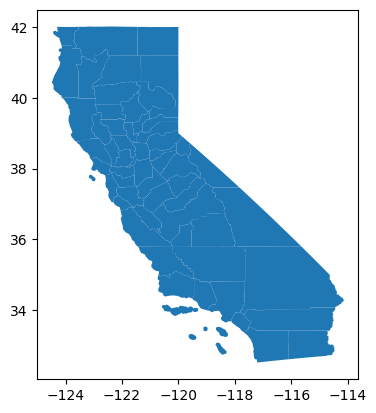

In [8]:
# download california state shapefile
import geopandas as gpd
from shapely import Point

california = gpd.read_file(
    "/home/patel_zeel/aq_data/aq_data/purpleair/raw/shapefiles/CA_Counties_TIGER2016.shp"
)
# set the crs to 4326 (lat/lon)
california = california.to_crs(epsg=4326)
california.plot()
california.head(2)

In [16]:
# convert all regions into a single polygon
poly = california["geometry"].unary_union

# use "laitude" and "longitude" from unique_df and create a new column named "lon_lat" which should have (longitude, latitude) tuples. For example, if longitude is 2, and latitude is 3, "lat_lon" should have tuple (2, 3)

unique_df["lon_lat"] = unique_df.apply(lambda row: (row["longitude"], row["latitude"]), axis=1)
unique_df["in_california"] = unique_df.apply(lambda row: poly.contains(Point(*row["lon_lat"])), axis=1)
unique_df.head(2)

/home/patel_zeel/miniconda3/lib/python3.9/site-packages/shapely/predicates.py:540: RuntimeWarning: invalid value encountered in contains
  return lib.contains(a, b, **kwargs)


,sensor_index,last_modified,date_created,last_seen,private,name,icon,location_type,model,hardware,...,altitude,channel_state,channel_flags,channel_flags_manual,channel_flags_auto,confidence,confidence_auto,confidence_manual,lon_lat,in_california
0,131079,1.634149e+09,1632955612,1688805540,0,BRSKBV-outside,0,0,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,544.0,3,0,0,0,100,100.0,100.0,"(-122.44364, 37.75315)",True
1,131077,1.634410e+09,1632955594,1688805527,0,BEE Patio,0,0,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,...,88.0,3,0,0,0,61,61.0,61.0,"(-122.03972, 37.93273)",True


In [26]:
unique_df[unique_df.location_type == 0].in_california.value_counts()

in_california
False    10911
True      7401
Name: count, dtype: int64